In [1]:
import pandas as pd
from Orange.evaluation import graph_ranks
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

In [75]:
meas = 'MCC'
gamma1, gamma2 = '10.0', '10.0'

In [76]:
table = pd.read_csv('csv/' + '_'.join([meas.lower(), gamma1, gamma2]) + '.csv', index_col = False)
table.head()

,alpha0.0(mcc),alpha0.3(mcc),alpha0.7(mcc),alpha1.0(mcc),mv(mcc),rf(mcc)
0,0.434,0.464,0.435,0.263,0.406,0.415
1,0.310,0.193,0.054,0.059,0.095,0.078
2,0.508,0.574,0.705,0.358,0.426,0.691
3,0.829,0.804,0.829,0.821,0.826,0.836
4,0.231,0.032,-0.017,0.074,0.032,0.169


In [77]:
ref = ['MV', 'RF']
alg = ['0.0', '0.3', '0.7', '1.0']
rows = alg + ref
generate_latex = ['$\Psi_{' + a + '}$' for a in alg] + ['$\Psi_{' + r.lower() + '}$' for r in ref]

In [78]:
table.shape

(11, 6)

In [79]:
ranks = table.transpose().round(3).rank(ascending = False)
mean_ranks = ranks.mean(axis = 1)
print(mean_ranks)
mean_ranks.round(2).values

alpha0.0(mcc)    3.590909
alpha0.3(mcc)    3.409091
alpha0.7(mcc)    3.590909
alpha1.0(mcc)    3.818182
mv(mcc)          3.863636
rf(mcc)          2.727273
dtype: float64


array([3.59, 3.41, 3.59, 3.82, 3.86, 2.73])

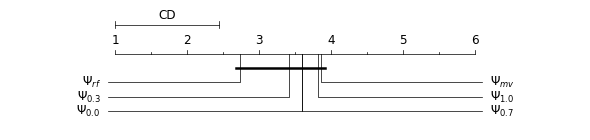

In [80]:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'size': 12})
# rc('font',**{'family':'serif','serif':['Palatino']})
fig = graph_ranks(mean_ranks.array, generate_latex, 1.44, textspace = 1.5, width = 8, filename=('_'.join([meas, str(int(float(gamma1))), str(int(float(gamma2)))]) + '.png'))

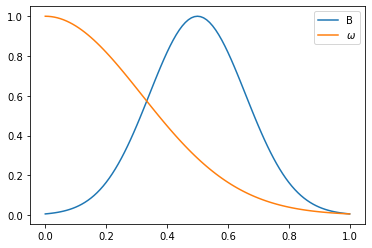

In [13]:
ar = np.linspace(0, 1, 101)
y1 = np.exp(np.power(ar - .5, 2) * (-20))
y2 = np.exp(np.power(ar, 2) * (-5))
plt.plot(ar, y1)
plt.plot(ar, y2)
plt.legend(['B', '$\omega$'])
plt.savefig('mapping.png')
